In [107]:
# -*- coding: utf-8 -*-
import dataiku
import pandas as pd, numpy as np
from dataiku import pandasutils as pdu

# Read recipe inputs
Test_scored = dataiku.Dataset("Test_scored")
Test_scored_df = Test_scored.get_dataframe()


# Compute recipe outputs from inputs
# TODO: Replace this part by your actual code that computes the output, as a Pandas dataframe
# NB: DSS also supports other kinds of APIs for reading and writing data. Please see doc.

prediction_analysis_df = Test_scored_df # For this sample code, simply copy input to output


# # Write recipe outputs
# prediction_analysis = dataiku.Dataset("prediction_analysis")
# prediction_analysis.write_with_schema(prediction_analysis_df)

In [108]:
Test_scored_df

,Category,Floor,Area(m²),Room_count,Price,Metro,Rayon,vision_score,Floor_First_Part,Floor_Second_Part,Floor_encode,prediction
0,1,1894.750000,90.0,3,799,1291.071514,1222.387712,2.578947,4,7,0.571429,1117.54910
1,1,803.909091,100.0,2,645,1034.609700,976.243526,2.666667,3,13,0.230769,836.10669
2,0,631.780142,104.0,3,750,1342.793963,967.835037,3.500000,5,5,1.000000,1076.92590
3,1,1081.562232,100.0,3,800,1024.623450,652.010386,2.437500,10,16,0.625000,672.77887
4,1,891.166667,60.0,2,700,691.293478,967.835037,3.750000,2,20,0.100000,630.15625
...,...,...,...,...,...,...,...,...,...,...,...,...
2723,1,2722.222222,120.0,3,3200,1291.071514,1394.606805,3.857143,7,33,0.212121,2974.38670
2724,1,897.794118,70.0,2,600,691.293478,967.835037,2.000000,18,20,0.900000,647.78418
2725,1,981.747253,65.0,2,1250,1024.623450,976.243526,4.000000,13,17,0.764706,1086.97970
2726,1,1067.724138,60.0,2,650,691.293478,967.835037,4.000000,18,19,0.947368,693.51855


In [109]:
absolute_percentage_error = ((Test_scored_df['prediction'] - Test_scored_df['Price']) / Test_scored_df['Price']) * 100

In [110]:
Test_scored_df['absolute_percentage_error']=absolute_percentage_error

In [111]:
error_bin_intervals = [-float('inf'), -40, -30, -20, -10, 0, 10, 20, 30, 40, float('inf')]

Test_scored_df['Absolute_error_bins'] = pd.cut(Test_scored_df['absolute_percentage_error'], bins=error_bin_intervals, right=True)

In [112]:
error_bin_intervals_price = [200, 400, 600, 800, 1000, 1200, 1500, 6000]

Test_scored_df['Price_bins'] = pd.cut(Test_scored_df['Price'], bins=error_bin_intervals_price, right=True)


In [113]:
Test_scored_df

,Category,Floor,Area(m²),Room_count,Price,Metro,Rayon,vision_score,Floor_First_Part,Floor_Second_Part,Floor_encode,prediction,absolute_percentage_error,Absolute_error_bins,Price_bins
0,1,1894.750000,90.0,3,799,1291.071514,1222.387712,2.578947,4,7,0.571429,1117.54910,39.868473,"(30.0, 40.0]","(600, 800]"
1,1,803.909091,100.0,2,645,1034.609700,976.243526,2.666667,3,13,0.230769,836.10669,29.628944,"(20.0, 30.0]","(600, 800]"
2,0,631.780142,104.0,3,750,1342.793963,967.835037,3.500000,5,5,1.000000,1076.92590,43.590120,"(40.0, inf]","(600, 800]"
3,1,1081.562232,100.0,3,800,1024.623450,652.010386,2.437500,10,16,0.625000,672.77887,-15.902641,"(-20.0, -10.0]","(600, 800]"
4,1,891.166667,60.0,2,700,691.293478,967.835037,3.750000,2,20,0.100000,630.15625,-9.977679,"(-10.0, 0.0]","(600, 800]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2723,1,2722.222222,120.0,3,3200,1291.071514,1394.606805,3.857143,7,33,0.212121,2974.38670,-7.050416,"(-10.0, 0.0]","(1500, 6000]"
2724,1,897.794118,70.0,2,600,691.293478,967.835037,2.000000,18,20,0.900000,647.78418,7.964030,"(0.0, 10.0]","(400, 600]"
2725,1,981.747253,65.0,2,1250,1024.623450,976.243526,4.000000,13,17,0.764706,1086.97970,-13.041624,"(-20.0, -10.0]","(1200, 1500]"
2726,1,1067.724138,60.0,2,650,691.293478,967.835037,4.000000,18,19,0.947368,693.51855,6.695162,"(0.0, 10.0]","(600, 800]"


In [114]:
pivot_table = pd.pivot_table(Test_scored_df, values='absolute_percentage_error', index='Price_bins', columns='Absolute_error_bins', aggfunc=np.size, fill_value=0, margins=True, margins_name='Total')


In [115]:
pivot_table

Absolute_error_bins,"(-inf, -40.0]","(-40.0, -30.0]","(-30.0, -20.0]","(-20.0, -10.0]","(-10.0, 0.0]","(0.0, 10.0]","(10.0, 20.0]","(20.0, 30.0]","(30.0, 40.0]","(40.0, inf]",Total
Price_bins,,,,,,,,,,,
"(200, 400]",1,0,1,1,5,8,11,12,9,12,60.0
"(400, 600]",0,0,2,20,79,122,114,56,24,40,457.0
"(600, 800]",0,0,9,67,159,156,126,70,38,47,672.0
"(800, 1000]",0,2,18,56,126,155,82,47,27,33,546.0
"(1000, 1200]",1,1,24,39,91,50,29,17,5,13,270.0
"(1200, 1500]",5,11,36,50,80,58,36,10,7,13,306.0
"(1500, 6000]",40,41,46,74,104,59,17,21,9,6,417.0
Total,47,55,136,307,644,608,415,233,119,164,2728.0


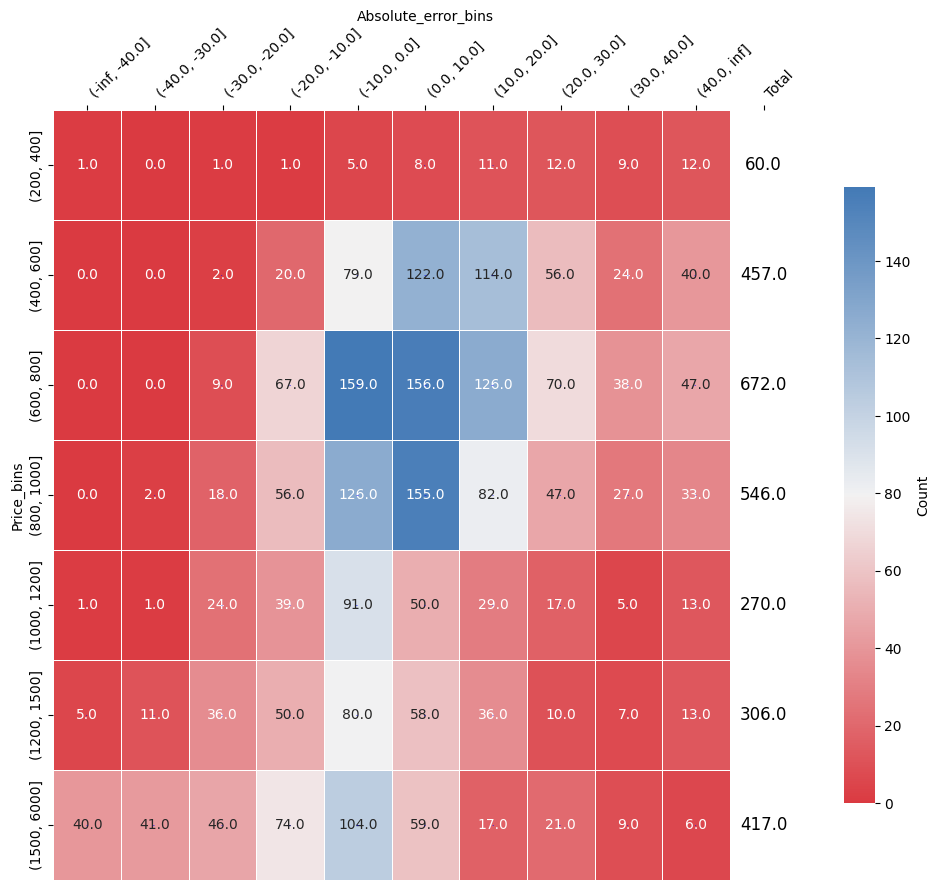

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a pivot table
pivot_table = pd.pivot_table(Test_scored_df, values='absolute_percentage_error', index='Price_bins', columns='Absolute_error_bins', aggfunc=np.size, fill_value=0, margins=True, margins_name='Total')
pivot_table = pivot_table.iloc[:-1]

# Exclude the total column
mask = np.zeros_like(pivot_table.values, dtype=bool)
mask[:, -1] = True  # Assuming the total column is the last one
# Set the color map for the heatmap
cmap = sns.diverging_palette(371, 248, n=9,  center='light', as_cmap=True)
# Plot the heatmap
plt.figure(figsize=(12, 10))
ax = sns.heatmap(pivot_table, mask=mask, annot=True, fmt=".1f", cmap=cmap, linewidths=.5, cbar_kws={"shrink": 0.8})

# Move x-axis labels and title to the top
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

# Set the x-axis labels and title
plt.xticks(rotation=45, ha='left')  # Adjust rotation and horizontal alignment as needed
#plt.xlabel('Price Bins')
#plt.title('Absolute Percentage Error Counts')


# Modify y-axis labels to include "Total" on the right
yticks_labels = pivot_table.index.tolist()
#yticks_labels[-1] += ' Total'
ax.set_yticklabels(yticks_labels)

# Get the current Axes instance for colorbar
cbar = ax.collections[0].colorbar
cbar.set_label('Count')

for (j, i), label in np.ndenumerate(pivot_table.values):
    if i == pivot_table.shape[1] - 1:  # Total column on the right
        ax.text(i + 0.5, j + 0.5, label, fontdict=dict(ha='center', va='center', color='black', fontsize=12))
    else:
        ax.text(i + 0.5, j + 0.5, label, fontdict=dict(ha='center', va='center', color='b', fontsize=0))

# Show the plot
plt.show()


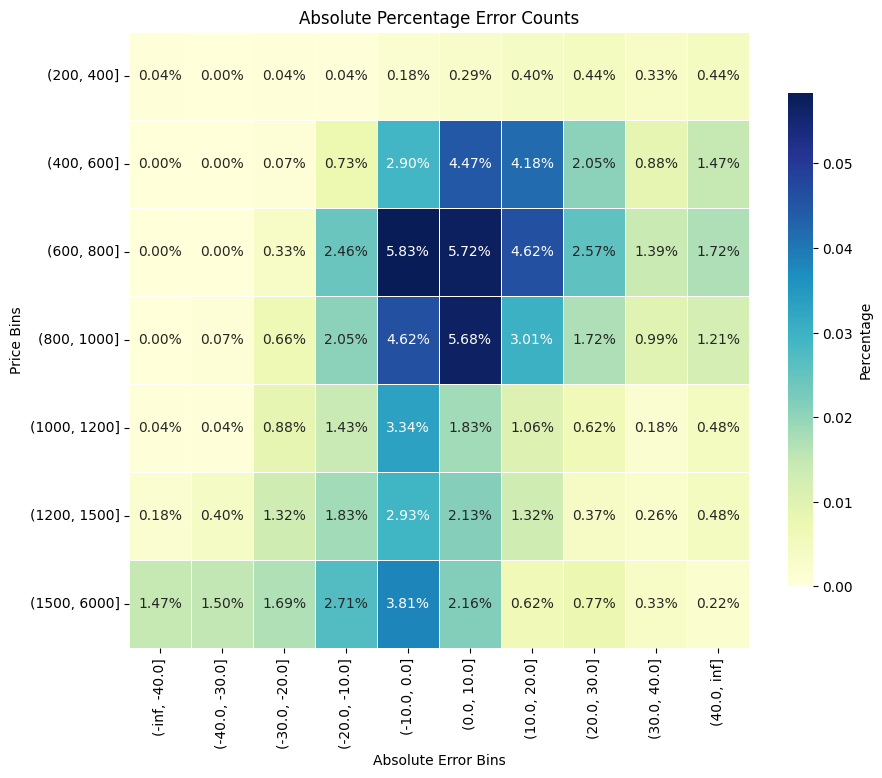

In [142]:
# Define the custom aggregation function
def percentage_count(x):
    return len(x) / len(Test_scored_df['Price'])

pivot_table = pd.pivot_table(Test_scored_df, values='absolute_percentage_error', index='Price_bins', columns='Absolute_error_bins', aggfunc=percentage_count, fill_value=0)

custom_palette = sns.color_palette("YlGnBu", as_cmap=True)

# Plot the heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(pivot_table, annot=True, fmt=".2%", cmap=custom_palette, linewidths=.5, cbar_kws={"shrink": 0.8})

# Set plot labels and title
plt.xlabel('Absolute Error Bins')
plt.ylabel('Price Bins')
plt.title('Absolute Percentage Error Counts')

# Get the current Axes instance for colorbar
cbar = heatmap.collections[0].colorbar
cbar.set_label('Percentage')

# Show the plot
plt.show()

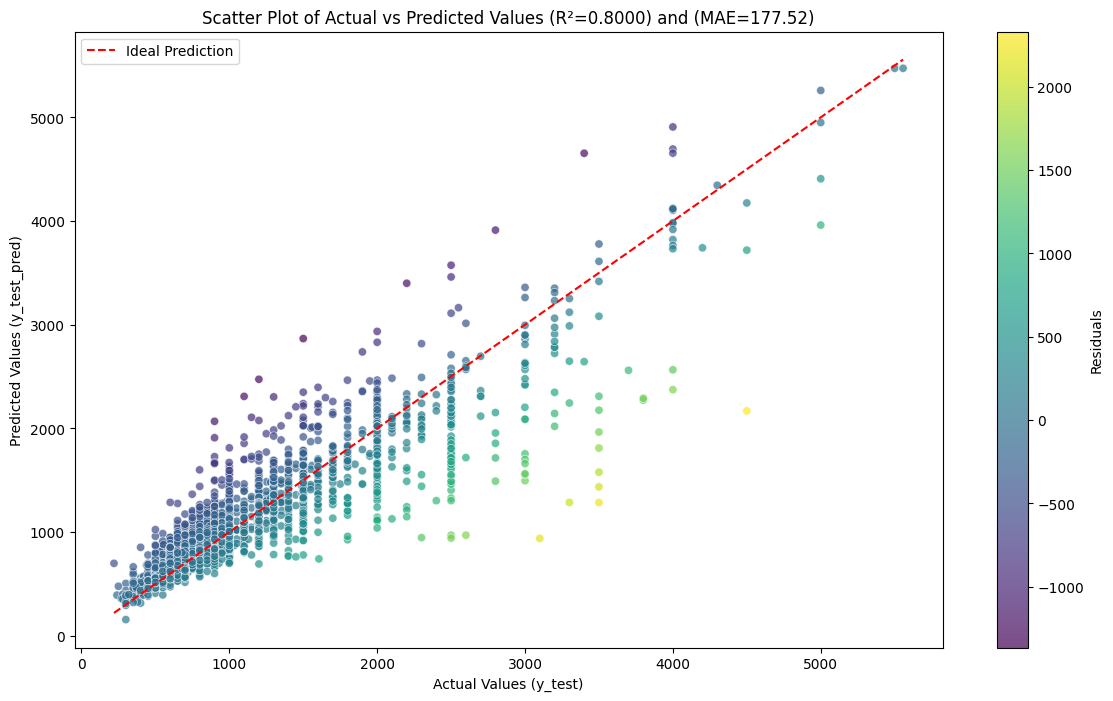

In [143]:
residuals = Test_scored_df['Price'] - Test_scored_df['prediction']

plt.figure(figsize=(14, 8))


r_squared = 1 - (np.sum(residuals**2) / np.sum((Test_scored_df['Price']  - np.mean(Test_scored_df['Price'] ))**2))

plt.scatter(Test_scored_df['Price'] , Test_scored_df['prediction'], c=residuals, cmap='viridis', alpha=0.7, edgecolors='w', linewidth=0.5)

# Add colorbar to indicate the magnitude of errors
cbar = plt.colorbar()
cbar.set_label('Residuals')

plt.plot([min(Test_scored_df['Price'] ), max(Test_scored_df['Price'] )], [min(Test_scored_df['Price'] ), max(Test_scored_df['Price'] )], linestyle='--', color='red', label='Ideal Prediction')

plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_test_pred)')
plt.title(f'Scatter Plot of Actual vs Predicted Values (R²={r_squared:.4f}) and (MAE={mae:.2f})')
#plt.title(f'Scatter Plot of Actual vs Predicted Values (MAE={mae:.4f})')


# Add legend
plt.legend()

# Show the plot
plt.show()


In [32]:
from sklearn.metrics import mean_absolute_error

y_true = Test_scored_df['Price']
y_pred = Test_scored_df['prediction']

mae = mean_absolute_error(y_true, y_pred)

print("Mean Absolute Error:", mae)


Mean Absolute Error: 177.5174366568915
